Доля пользователь с одним действием: 9.3%
Всего: 658 уникальных пользователей(с 28.09.2024)


C:\Users\Home\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\Home\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  func(*args, **kwargs)
C:\Users\Home\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 128450 (\N{CARD INDEX DIVIDERS}) missing from current font.
  func(*args, **kwargs)
C:\Users\Home\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  func(*args, **kwargs)
C:\Users\Home\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from current font.
  func(*args, **kwargs)
C:\Users\Home\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 128064 (\N{EYES}) 

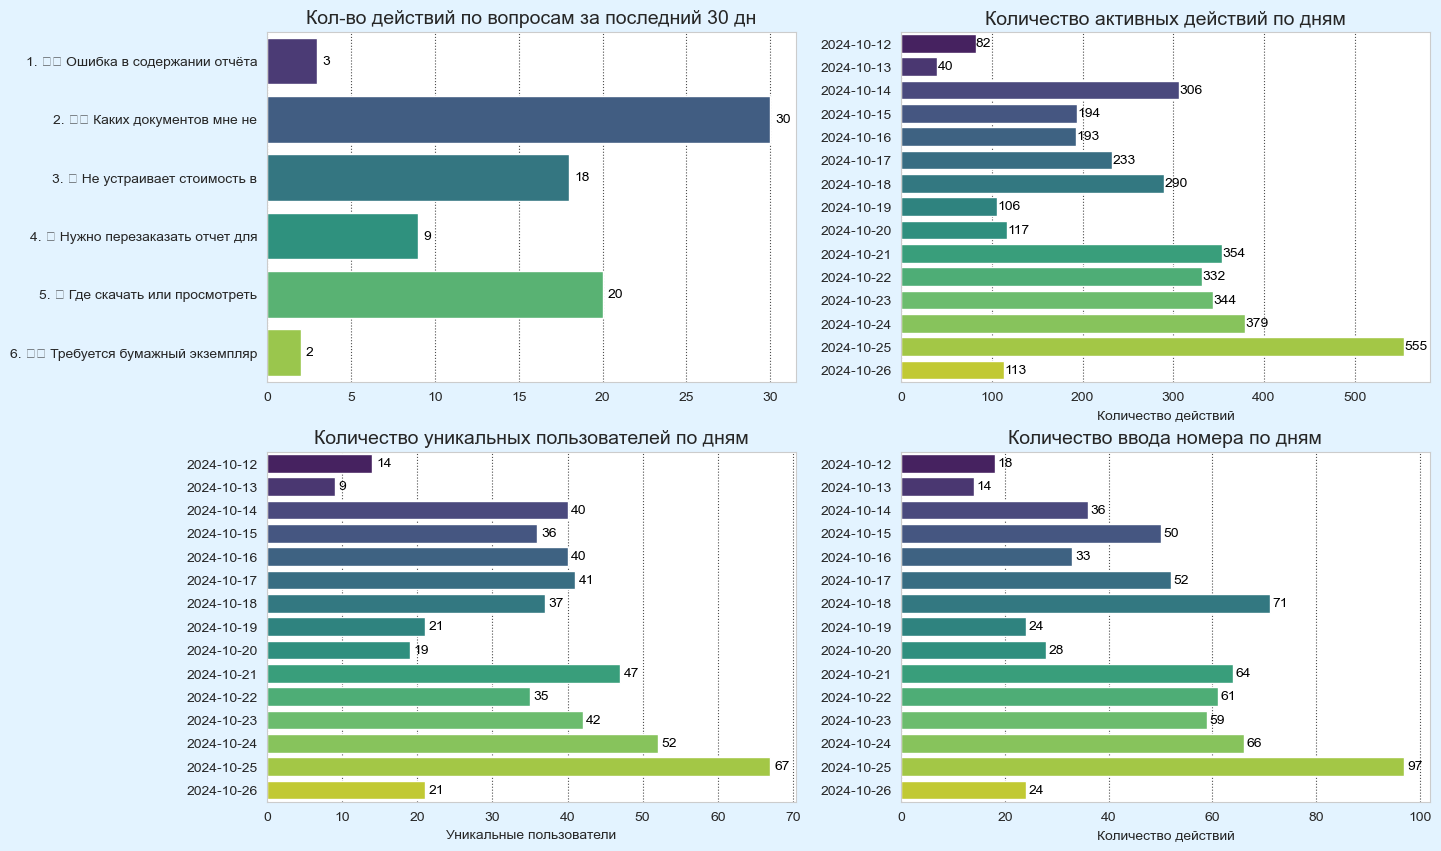

In [3]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import time
from datetime import datetime, timedelta, date


def filter_for_table(filter_word):
    
    with open(r'C:\Users\Home\Downloads\C_UsersHomePlanfixlogsfrombot2 (27).lo', encoding='utf-8') as file:
        text = file.read()
    lines = text.splitlines()
    
    filtered_lines = [line for line in lines if "Status_zadachibot" not in line and "Пользователь" \
                      in line and filter_word in line]
    users = []
    time = []
    data = []
    actions = []

    for line in filtered_lines:
        parts = line.split()
        time.append(parts[1])
        data.append(parts[0])
        users.append(parts[6])
        actions.append(" ".join(parts[7:]))

    df = pd.DataFrame({'Пользователь': users, 'Дата':data, 'Время': time,  'Действие': actions})

    return df


last_week = (datetime.now() - timedelta(days=14)).date()
time_delt_qa = (datetime.now() - timedelta(days=30)).date()

# Пример данных, замените на ваш источник
df_question = filter_for_table("интересовался")
df_question['Дата'] = pd.to_datetime(df_question['Дата']).dt.date
df_question = df_question[df_question['Дата'] >= time_delt_qa] 
df_question['Действие'] = df_question['Действие'].str.replace('интересовался вопросом', '').str.strip()

# Табличка
question_data = df_question.groupby('Действие').size().reset_index(name='Количество')

#Количество активных дейсвтий по дням
df_users_per_day = filter_for_table('')
df_users_per_day['Дата'] = pd.to_datetime(df_users_per_day['Дата']).dt.date
df_users_per_day = df_users_per_day[df_users_per_day['Дата'] >= last_week]
df_actions_per_day = df_users_per_day.groupby('Дата').size().reset_index(name='Количество действий')

df_number = filter_for_table('ввёл номер')
df_number['Дата'] = pd.to_datetime(df_number['Дата']).dt.date
df_number = df_number[df_number['Дата'] >= last_week]
enter_number_order = df_number.groupby('Дата').size().reset_index(name='Количество вводов номеров')
df_users_per_day = filter_for_table('')

# Преобразуем столбец 'Дата' в формат datetime
df_users_per_day['Дата'] = pd.to_datetime(df_users_per_day['Дата'])


df_users_per_day_lstw = df_users_per_day[df_users_per_day['Дата'].dt.date >= last_week]

# Группировка по уникальным пользователям за день
unique_users_per_day = df_users_per_day_lstw.groupby(df_users_per_day_lstw['Дата'].dt.date)['Пользователь'].nunique().reset_index(name='Уникальные пользователи')

# Настройки для графиков
sns.set_style("whitegrid", {"grid.color": ".3", "grid.linestyle": ":"})
plt.rcParams['font.family'] = 'Arial'
date_to_compare = date(2024, 9, 28)  # Используем date для создания объекта даты

# Фильтрация по месяцу
monthly_users = df_users_per_day[df_users_per_day['Дата'].dt.date >= date_to_compare]
unique_users = monthly_users['Пользователь'].nunique()
# Создаем фигуру и оси для трех графиков
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# График 1: Горизонтальная столбчатая диаграмма действий
barplot = sns.barplot(x='Количество', y='Действие', data=question_data, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Кол-во действий по вопросам за последний 30 дн', fontsize=14)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('')

for index, row in question_data.iterrows():
    barplot.text(row.Количество + 0.3, index, row.Количество, color='black', va="center")

# График 2: Количество активных действий по дням (перевернутый)
barplot_actions = sns.barplot(y='Дата', x='Количество действий', data=df_actions_per_day, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Количество активных действий по дням', fontsize=14)
axes[0, 1].set_ylabel('')  # Обменяли x и y
axes[0, 1].set_xlabel('Количество действий')  # Обменяли x и y
for index, row in df_actions_per_day.iterrows():
    barplot_actions.text(row['Количество действий'] + 0.5, index, row['Количество действий'], color='black', va="center")

# График 3: Количество уникальных пользователей по дням (перевернутый)
barplot_users = sns.barplot(y='Дата', x='Уникальные пользователи', data=unique_users_per_day, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Количество уникальных пользователей по дням', fontsize=14)
axes[1, 0].set_ylabel('')
axes[1, 0].set_xlabel('Уникальные пользователи')
for index, row in unique_users_per_day.iterrows():
    barplot_users.text(row['Уникальные пользователи'] + 0.5, index, row['Уникальные пользователи'], color='black', va="center") # Смещение влево

barplot_numbers = sns.barplot(y='Дата', x='Количество вводов номеров',data=enter_number_order,\
                              palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Количество ввода номера по дням', fontsize=14)
axes[1, 1].set_ylabel('')  # Обменяли x и y
axes[1, 1].set_xlabel('Количество действий')  # Обменяли x и y
for index, row in enter_number_order.iterrows():
    barplot_numbers.text(row['Количество вводов номеров'] + 0.5, index, row['Количество вводов номеров'],\
                         color='black', va="center")
fig.patch.set_facecolor('#e3f3ff')

table = filter_for_table('')
table = table.groupby('Пользователь')['Действие'].count()
filtred_data = table[table == 1]
result = (f'Доля пользователь с одним действием: {round((len(filtred_data)/len(table)), 3)*100}%')
print(result)

# plt.tight_layout()
# plt.show()
print(f'Всего: {unique_users} уникальных пользователей(с 28.09.2024)')

In [2]:
# filter_for_table('').to_excel(r"C:\Users\Home\Documents\dot_data.xlsx", index=False)

In [47]:
lst_of_est = filter_for_table('поставил оценку:')['Действие']
iteration = [i.split(' ')[2] for i in lst_of_est]
sum_of_est = 0
for i in iteration:
    sum_of_est += float(i)
sum_of_est
print(f'средняя оценка: {sum_of_est/len(iteration)}')

средняя оценка: 3.3333333333333335


In [48]:
# фильтр на будущее шоб фильтровать без меня
lst_of_est = filter_for_table('поставил оценку:')[filter_for_table('поставил оценку:')['Пользователь'] != '1156662943']
lst_of_est

,Пользователь,Дата,Время,Действие


'Итого число пользователь с одним действием: 8.7%'